In [2]:
% matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from IPython.display import Image

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Translator import Translator
from DecisionTree import DecisionTree
import preprocessor as pp

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("sample.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

# Divide in blocks, extend dataset and clean data
block_data = pp.define_blocks(raw_data)
cleaned_block_data = pp.clean_processed_data(block_data)
extended_data = pp.extend_data(cleaned_block_data)
cleaned_extended_data = pp.clean_extended_data(extended_data)
# Create decision trees
[data, labels] = pp.prepare_to_decision_trees (cleaned_extended_data)
hyper_dt = DecisionTree(data, labels["Hyperglycemia_Diagnosis_Next_Block"])
severe_dt = DecisionTree(data, labels["Severe_Hyperglycemia_Diagnosis_Next_Block"])
hypo_dt = DecisionTree(data, labels["Hypoglycemia_Diagnosis_Next_Block"])

## Hyperglycemia decision tree

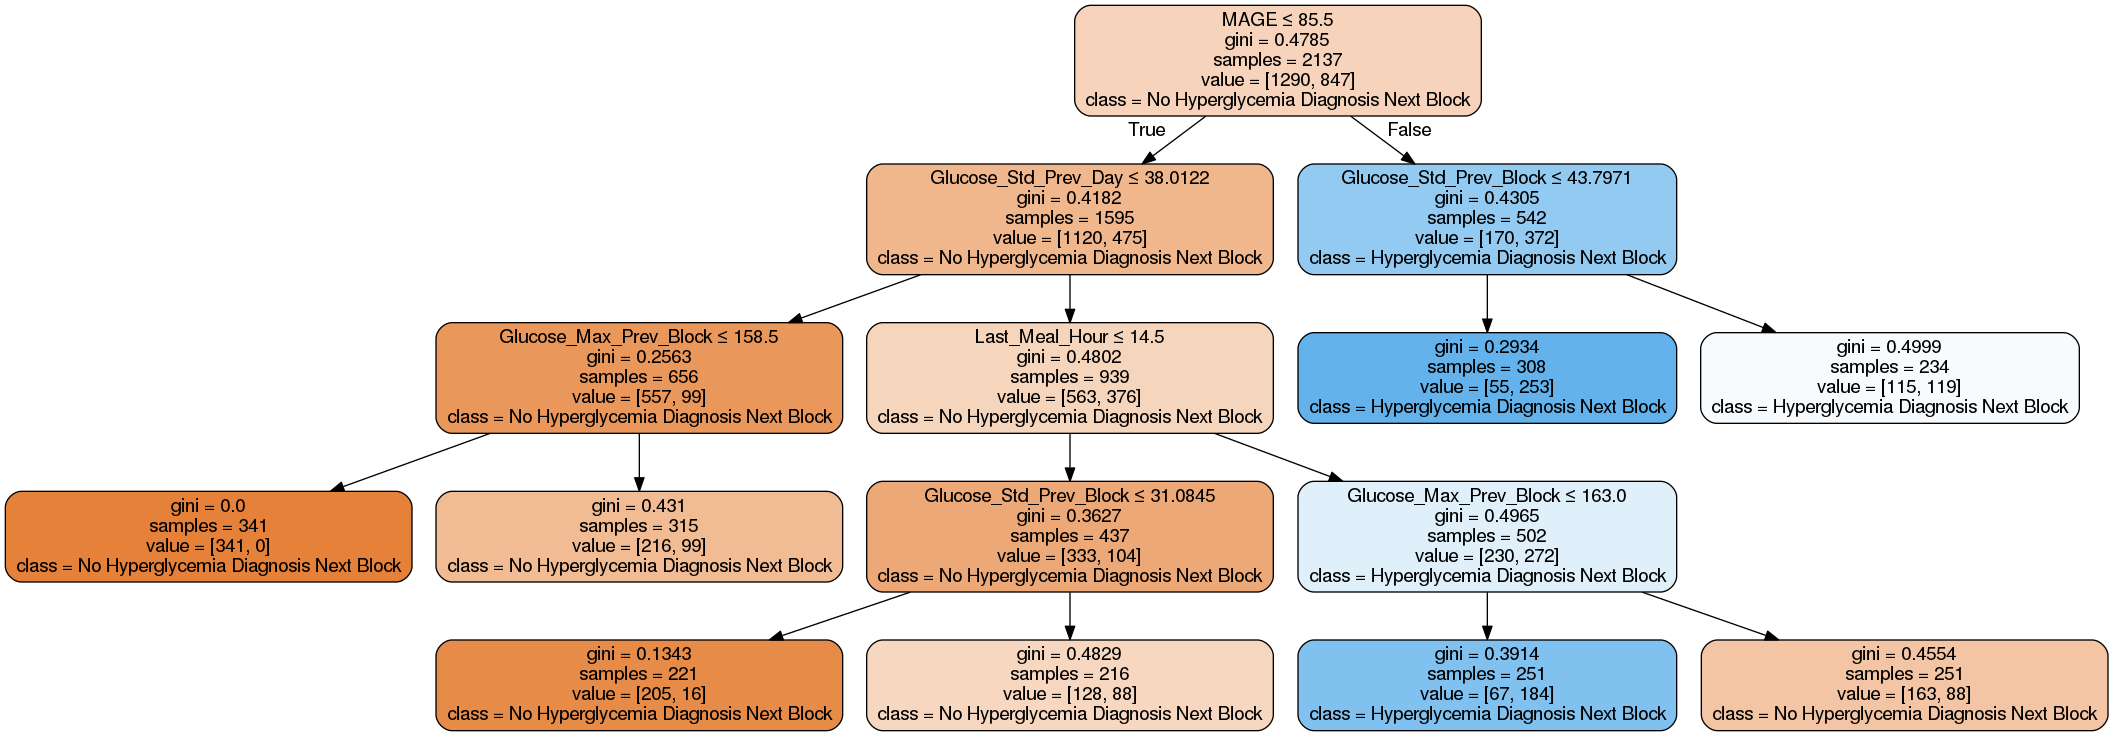

In [3]:
Image(hyper_dt.graph.create_png())

In [4]:
print("Evaluation")
print("ROC: {}".format(hyper_dt.cross_val_score(scoring='roc_auc')))
print("Precision: {}".format(hyper_dt.cross_val_score(scoring='precision')))
print("Recall: {}".format(hyper_dt.cross_val_score(scoring='recall')))

Evaluation


ROC: 0.5470120296180487


/home/franxi/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.46678056544055674


Recall: 0.3321988795518207


In [5]:
print("Feature importance")
for idx, score in enumerate(hyper_dt.feature_importances):
    if score > 0:
        print("{:s} : {:.4f} ".format(data.columns[idx], score))

Feature importance
MAGE : 0.3668 
Last_Meal_Hour : 0.1295 
Glucose_Std_Prev_Block : 0.1518 
Glucose_Max_Prev_Block : 0.2074 
Glucose_Std_Prev_Day : 0.1444 


## Severe Hyperglycemia decision tree

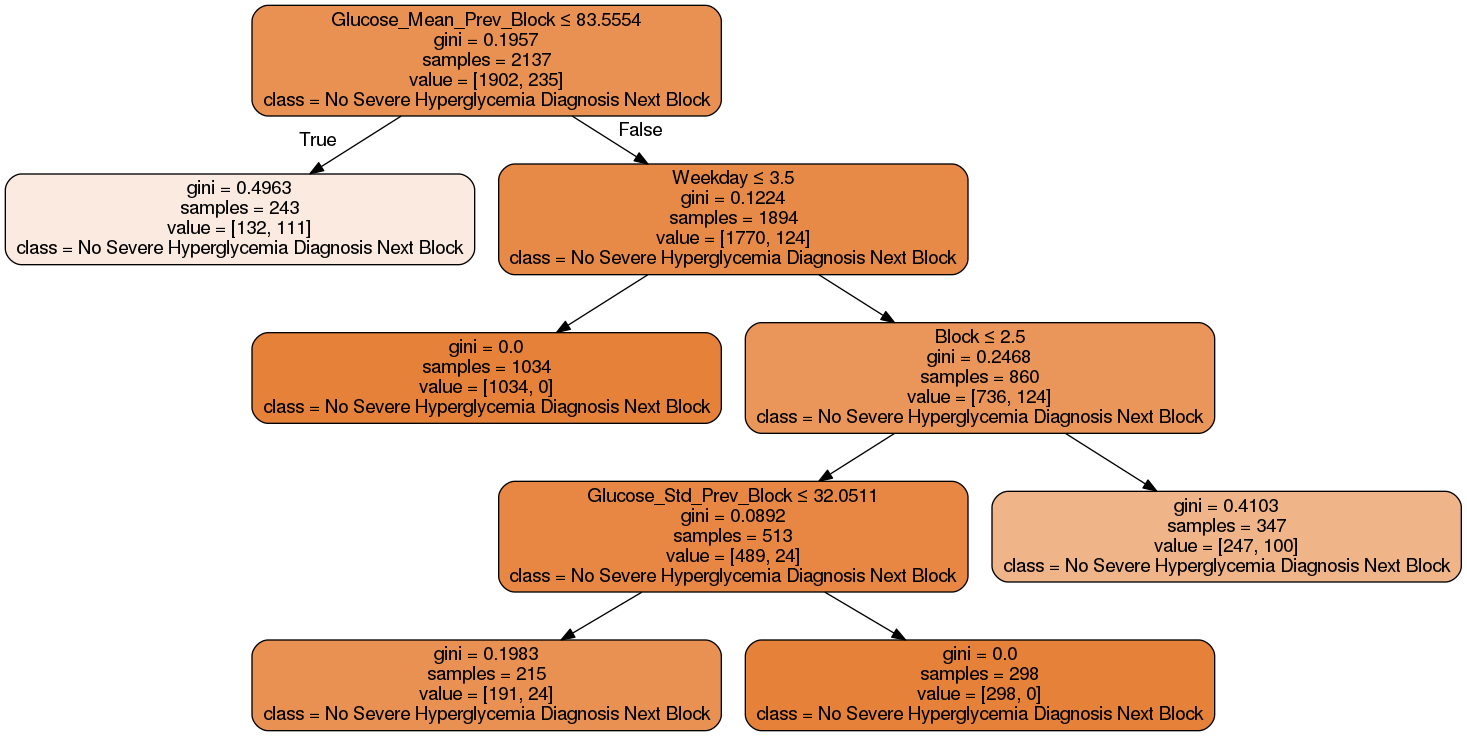

In [6]:
Image(severe_dt.graph.create_png())

In [7]:
print("Evaluation")
print("ROC: {}".format(severe_dt.cross_val_score(scoring='roc_auc')))
print("Precision: {}".format(severe_dt.cross_val_score(scoring='precision')))
print("Recall: {}".format(severe_dt.cross_val_score(scoring='recall')))

Evaluation


ROC: 0.750641890407786


/home/franxi/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/franxi/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.011165048543689321


Recall: 0.1


In [8]:
print("Feature importance")
for idx, score in enumerate(severe_dt.feature_importances):
    if score > 0:
        print("{:s} : {:.4f} ".format(data.columns[idx], score))

Feature importance
Block : 0.2140 
Weekday : 0.1732 
Glucose_Mean_Prev_Block : 0.5852 
Glucose_Std_Prev_Block : 0.0276 


## Hypoglycemia decision tree

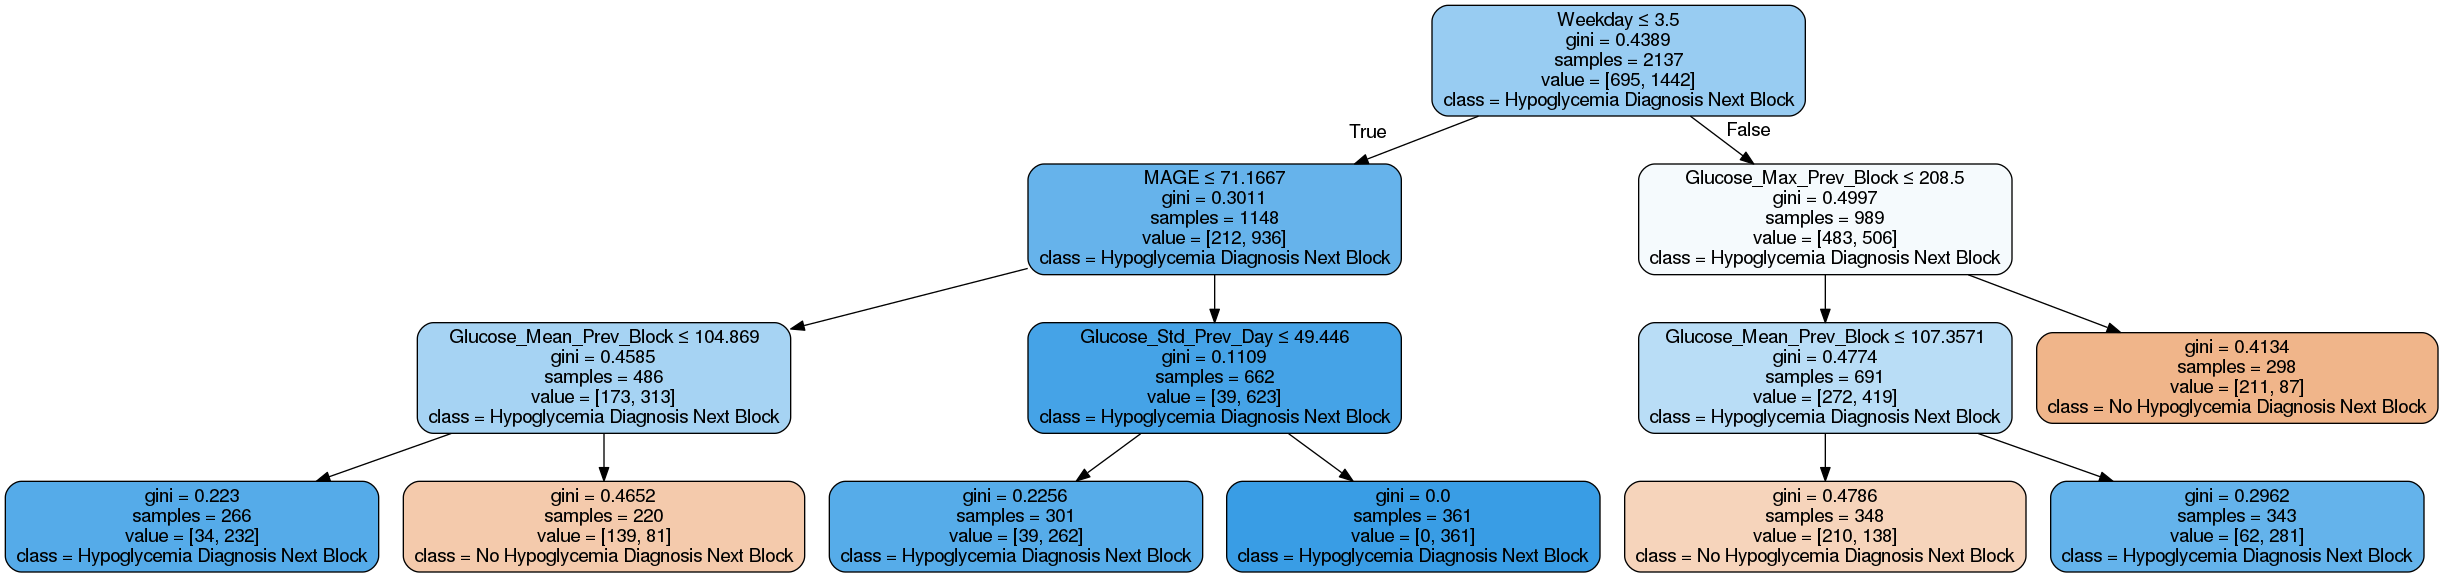

In [9]:
Image(hypo_dt.graph.create_png())

In [10]:
print("Evaluation")
print("ROC: {}".format(hypo_dt.cross_val_score(scoring='roc_auc')))
print("Precision: {}".format(hypo_dt.cross_val_score(scoring='precision')))
print("Recall: {}".format(hypo_dt.cross_val_score(scoring='recall')))

Evaluation


ROC: 0.4803011891871525


/home/franxi/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.5426592870042619


Recall: 0.6167959770114942


In [ ]:
print("Feature importance")
for idx, score in enumerate(hypo_dt.feature_importances):
    if score > 0:
        print("{:s} : {:.4f} ".format(data.columns[idx], score))